In [24]:
from IPython.display import display, HTML
import re
import json
import sys
"""
server_rep_msg = {
    "rep": rep_name,
    "query": query,
    "oov" : oov_flag,
    "result_exist": result_exist_flag,
    "memefname": memefname_list,
    "episode": episode_list,                
    "text" : text_list,
    "imgdata": imgdata_list,
    "sim": sim_list
}
"""
def show_result(loaded_json):
    for y in loaded_json:
        print('Request : ' + str(y['rep'] ) + '\nquery : ' + str(y['query']) )
        
        # show 'random' result
        if y['rep'] =='random':
            display(HTML('''<img src="data:image/jpg;base64,''' +y ['imgdata'][0] + '''">'''))             
            print('filename :', y['memefname'][0])                            
            print('episode :', y['episode'][0])
            print('text :',y['text'][0])            
            print("--- done ---\n")
            continue
        
        if y['oov']:
            print('# Dont know that word TT')

        if y['result_exist'] == False:
            print('# Cannot find similar meme TT (default min_sim=0.10)')

        if not y['result_exist'] or y['oov']:
            continue
            
        # show 'dank'
        for fname, episode, text, b64data, sim in zip(y['memefname'], y['episode'], y['text'], y['imgdata'], y['sim']):
            display(HTML('''<img src="data:image/jpg;base64,''' + b64data + '''">'''))    
            print('-- Results --')
            print('filename :', fname)                            
            print('episode :', episode)
            print('text :',text)
            if sim:
                print('similarity :',sim)
        print("--- done ---\n")

# REQ: 1 dank query. -> REP: N memes in a json in a list. 
#     = dank(['req_query']) -> [rep_json([memefname_list, episode_list, imgdata_list, ...])]

# REQ: N dank queries. -> REP: N jsons in a list.
#     = dank(['req1_query', 'req2_query']) -> [rep1_json(...), rep2_json(...), ...]

Request : dank
query : 식사



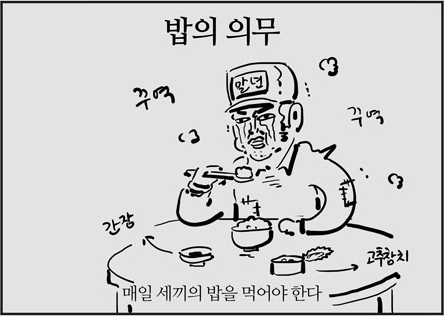

-- Results --
filename : 94화_잠은행上
episode : 94화_잠은행上-032.jpg
text : 밥의 의무 간장 매일 세끼의 밥을 먹어야 한다
similarity : 0.19498522579669952
--- done ---

Request : dank
query : 압도적 감사



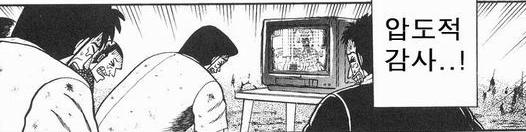

-- Results --
filename : Kaizi
episode : Kaizi-001.png
text : 압도적 감사
similarity : 0.9999992847442627
--- done ---

Request : random
query : None



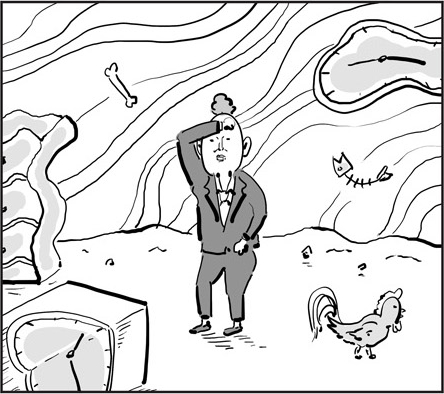

filename : 94화_잠은행上
episode : 94화_잠은행上-010.jpg
text : 
--- done ---



In [55]:
import client
mg = client.MgClient()

# Meme with query.
show_result(mg.dank(['식사', '압도적 감사'], max_img=1, min_sim=0.15))
# Random meme.
res_list = mg.random()
show_result(res_list)
# Save as a file.
rand_res = res_list[0]
mg.save_meme(rand_res['imgdata'][0], rand_res['memefname'][0])